<a href="https://colab.research.google.com/github/Arturo9314/Data_Analysis/blob/main/01-FB/Financial_Budget_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Budget Analysis**


Every nation has a financial budget that details the goverment's ability to spend money on various facets of the economy.


I begin by importing the required Python libraries and dataset containing information on the Mexican goverment's proposed fiscal year 2023 budget.

[dataset](https://www.transparenciapresupuestaria.gob.mx/es/PTP/Infografia_PPEF_2023)



In [88]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Data Analysis/Financial Budget/PPEF_2023.csv", encoding="latin-1")
data.head()

<ipython-input-89-909986e929f0>:4: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data Analysis/Financial Budget/PPEF_2023.csv", encoding="latin-1")


,CICLO,ID_RAMO,DESC_RAMO,ID_UR,DESC_UR,GPO_FUNCIONAL,DESC_GPO_FUNCIONAL,ID_FUNCION,DESC_FUNCION,ID_SUBFUNCION,...,ID_PARTIDA_ESPECIFICA,DESC_PARTIDA_ESPECIFICA,ID_TIPOGASTO,DESC_TIPOGASTO,ID_FF,DESC_FF,ID_ENTIDAD_FEDERATIVA,ENTIDAD_FEDERATIVA,ID_CLAVE_CARTERA,MONTO_PROYECTO
0,2023,1,Poder Legislativo,100,H. Cámara de Diputados,1,Gobierno,1,Legislación,1,...,62201,Obras de construcción para edificios no habita...,3,Gasto de obra pública,1,Recursos fiscales,9,Ciudad de México,0,"404,400,000.0"
1,2023,1,Poder Legislativo,100,H. Cámara de Diputados,1,Gobierno,1,Legislación,1,...,11101,Dietas (Ramos Autónomos),1,Gasto corriente,1,Recursos fiscales,9,Ciudad de México,0,"632,268,000.0"
2,2023,1,Poder Legislativo,100,H. Cámara de Diputados,1,Gobierno,1,Legislación,1,...,11301,Sueldos base,1,Gasto corriente,1,Recursos fiscales,9,Ciudad de México,0,"571,150,100.0"
3,2023,1,Poder Legislativo,100,H. Cámara de Diputados,1,Gobierno,1,Legislación,1,...,12101,Honorarios,1,Gasto corriente,1,Recursos fiscales,9,Ciudad de México,0,"992,069,294.0"
4,2023,1,Poder Legislativo,100,H. Cámara de Diputados,1,Gobierno,1,Legislación,1,...,12301,Retribuciones por servicios de carácter social,1,Gasto corriente,1,Recursos fiscales,9,Ciudad de México,0,"1,992,000.0"


Let's examine each label that is included in this budget

In [90]:
data.columns

Index(['CICLO', 'ID_RAMO', 'DESC_RAMO', 'ID_UR', 'DESC_UR', 'GPO_FUNCIONAL',
       'DESC_GPO_FUNCIONAL', 'ID_FUNCION', 'DESC_FUNCION', 'ID_SUBFUNCION',
       'DESC_SUBFUNCION', 'ID_AI', 'DESC_AI', 'ID_MODALIDAD', 'DESC_MODALIDAD',
       'ID_PP', 'DESC_PP', 'ID_CAPITULO', 'DESC_CAPITULO', 'ID_CONCEPTO',
       'DESC_CONCEPTO', 'ID_PARTIDA_GENERICA', 'DESC_PARTIDA_GENERICA',
       'ID_PARTIDA_ESPECIFICA', 'DESC_PARTIDA_ESPECIFICA', 'ID_TIPOGASTO',
       'DESC_TIPOGASTO', 'ID_FF', 'DESC_FF', 'ID_ENTIDAD_FEDERATIVA',
       'ENTIDAD_FEDERATIVA', 'ID_CLAVE_CARTERA', 'MONTO_PROYECTO'],
      dtype='object')

In order to prepare the data, let's choose just two columns of data, which will help us describe expenditure that make it possible to track the actions taken by the state to advance its governmental, economic, and social goals.

In [91]:
df = data.loc[:, ["DESC_GPO_FUNCIONAL","MONTO_PROYECTO"]]
print(df)

          DESC_GPO_FUNCIONAL     MONTO_PROYECTO
0                   Gobierno     404,400,000.0 
1                   Gobierno     632,268,000.0 
2                   Gobierno     571,150,100.0 
3                   Gobierno     992,069,294.0 
4                   Gobierno       1,992,000.0 
...                      ...                ...
149060  Desarrollo Económico       1,135,982.0 
149061  Desarrollo Económico       1,538,569.0 
149062  Desarrollo Económico           5,350.0 
149063  Desarrollo Económico      10,226,115.0 
149064  Desarrollo Económico   7,806,611,287.0 

[149065 rows x 2 columns]


The amount column is not a numeric column, as can be seen.

In [92]:
df.dtypes

DESC_GPO_FUNCIONAL    object
MONTO_PROYECTO        object
dtype: object

So let's transform the type of the column

In [93]:
df['MONTO_PROYECTO'] = df['MONTO_PROYECTO'].str.replace(',', '').astype(float)

In [94]:
df.dtypes

DESC_GPO_FUNCIONAL     object
MONTO_PROYECTO        float64
dtype: object

Now it is possible to group

In [95]:
groups = df.groupby("DESC_GPO_FUNCIONAL")['MONTO_PROYECTO'].sum()
print(groups)

DESC_GPO_FUNCIONAL
Desarrollo Económico                             1.831631e+12
Desarrollo Social                                4.979214e+12
Gobierno                                         4.975380e+11
Otras no Clasificadas en Funciones Anteriores    2.157464e+12
Name: MONTO_PROYECTO, dtype: float64


Now let’s plot this data to have a look at the priorities of the government for the financial year:

<Axes: xlabel='Millions of Mexican pesos', ylabel='Government services'>

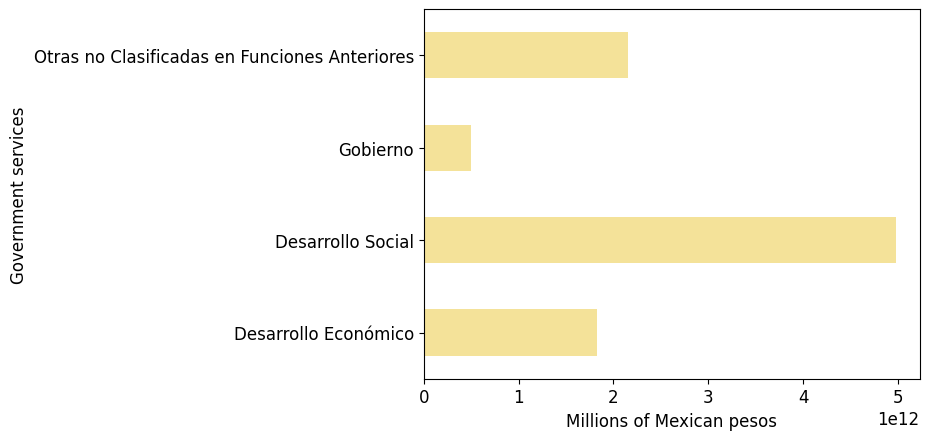

In [96]:
groups.plot(kind='barh', ylabel='Government services', xlabel='Millions of Mexican pesos', color=(.9215, .7764, .2039, 0.5))

We can see that "Desarrollo Social" is getting the most of the share from the total budget of goverment. Now let’s plot this data into a donut plot to have a clear view of the distribution of funds among all goverment services.


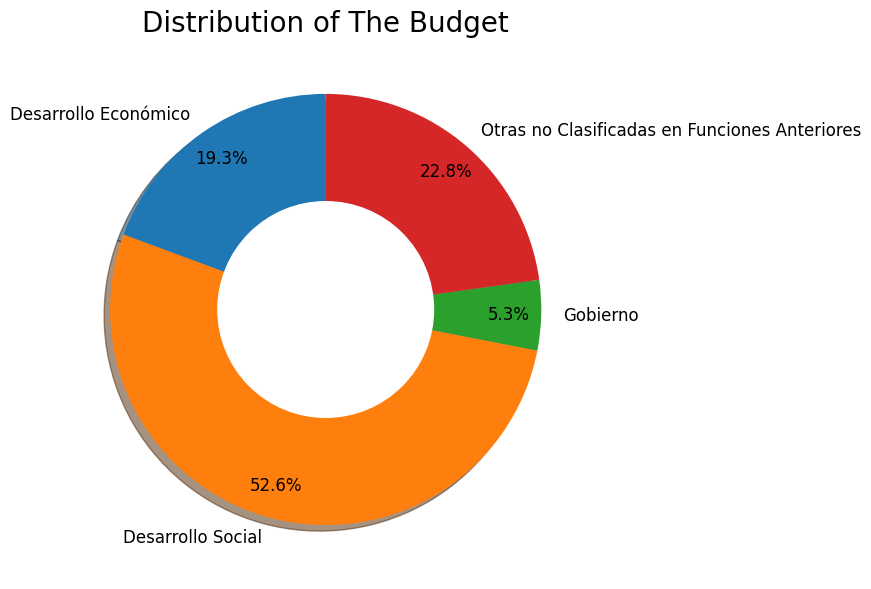

In [97]:
df_pie = groups
labels = df.groupby("DESC_GPO_FUNCIONAL").sum().index
plt.figure(figsize=(7,7))
plt.pie(df_pie, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of The Budget", fontsize=20)
plt.show()

## Conclusion

We can see that the "desarrollo social" is getting 52.6 % of the founds
